In [133]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [134]:
src_base = cv.imread('./0002_c1s1_000801_01.jpg')
src_base = cv.cvtColor(src_base, cv.COLOR_BGR2RGB)
src_test1 = cv.imread('./0002_c1s1_069056_02.jpg')
src_test1 = cv.cvtColor(src_test1, cv.COLOR_BGR2RGB)
src_test2 = cv.imread('./test.jpg')
src_test2 = cv.cvtColor(src_test2, cv.COLOR_BGR2RGB)

images = [src_base, src_test1, src_test2]

<ipython-input-135-4f18b40fa933>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


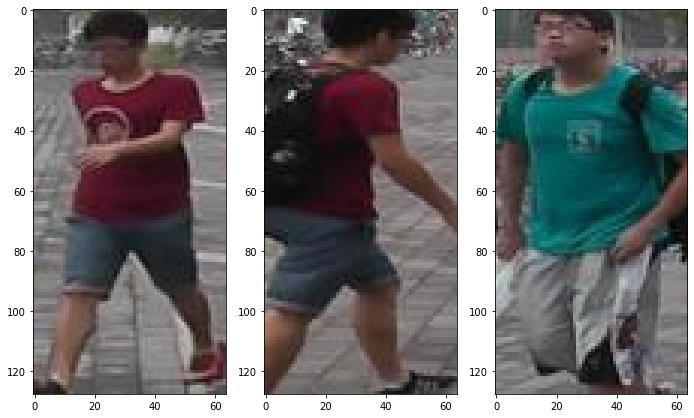

In [135]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [122]:
mask = np.zeros(src_base.shape[:2], np.uint8)

bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

rect = (0,0,src_base.shape[1]-1,src_base.shape[0]-1)
cv.grabCut(src_base,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
src_base = src_base*mask2[:,:,np.newaxis]

In [123]:
mask = np.zeros(src_test1.shape[:2], np.uint8)

bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

rect = (0,0,src_test1.shape[1]-1,src_test1.shape[0]-1)
cv.grabCut(src_test1,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
src_test1 = src_test1*mask2[:,:,np.newaxis]

In [124]:
mask = np.zeros(src_test2.shape[:2], np.uint8)

bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

rect = (0,0,src_test2.shape[1]-1,src_test2.shape[0]-1)
cv.grabCut(src_test2,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
src_test2 = src_test2*mask2[:,:,np.newaxis]

<ipython-input-125-edeae73d2513>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


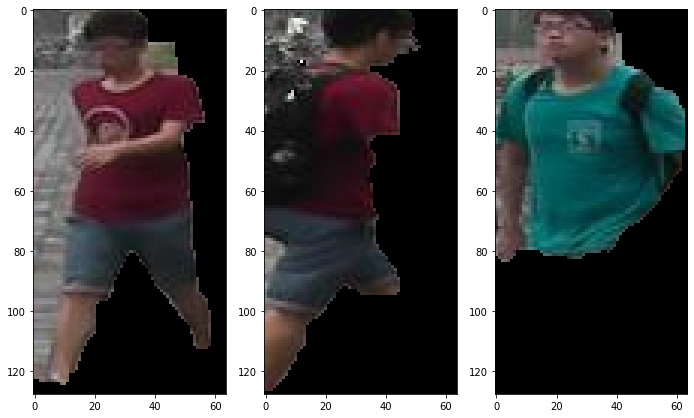

In [125]:
images = [src_base, src_test1, src_test2]
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [136]:
hsv_base = cv.cvtColor(src_base, cv.COLOR_BGR2HSV)
hsv_test1 = cv.cvtColor(src_test1, cv.COLOR_BGR2HSV)
hsv_test2 = cv.cvtColor(src_test2, cv.COLOR_BGR2HSV)


In [137]:
h_bins = 50
s_bins = 60
histSize = [h_bins, s_bins]
# hue varies from 0 to 179, saturation from 0 to 255
h_ranges = [0, 180]
s_ranges = [0, 256]
ranges = h_ranges + s_ranges # concat lists
# Use the 0-th and 1-st channels
channels = [0, 1]

In [138]:
hsv_half_down = hsv_base[hsv_base.shape[0]//2:,:]

In [139]:
hsv_images = [hsv_base, hsv_test1, hsv_test2]

<ipython-input-130-8a5cb9d7789d>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


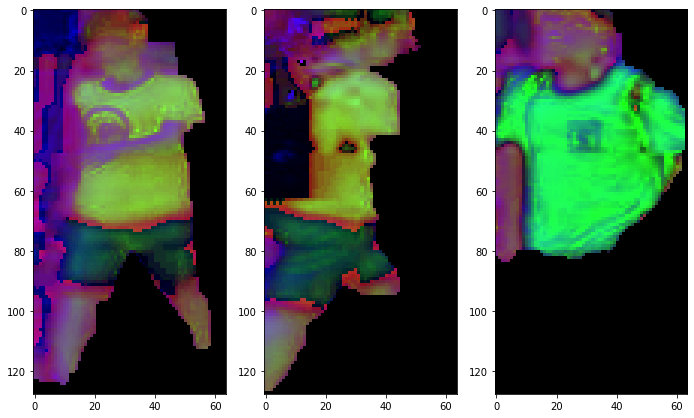

In [130]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(hsv_images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [131]:
hist_base = cv.calcHist([hsv_base], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_base, hist_base, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
hist_half_down = cv.calcHist([hsv_half_down], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_half_down, hist_half_down, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
hist_test1 = cv.calcHist([hsv_test1], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_test1, hist_test1, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
hist_test2 = cv.calcHist([hsv_test2], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_test2, hist_test2, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)

array([[9.9999994e-01, 2.5233408e-04, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

#### Methods:

- 0: Correlation
- 1: Chi-Sqared
- 2: Intersection
- 3: Bhattacharyya

In [132]:
for compare_method in range(4):
    base_base = cv.compareHist(hist_base, hist_base, compare_method)
    base_half = cv.compareHist(hist_base, hist_half_down, compare_method)
    base_test1 = cv.compareHist(hist_base, hist_test1, compare_method)
    base_test2 = cv.compareHist(hist_base, hist_test2, compare_method)
    print('Method:', compare_method, 'Perfect, Base-Half, Base-Test(1), Base-Test(2) :',\
          base_base, '/', base_half, '/', base_test1, '/', base_test2)

Method: 0 Perfect, Base-Half, Base-Test(1), Base-Test(2) : 1.0 / 0.9970580695794117 / 0.996355130003526 / 0.985397340134042
Method: 1 Perfect, Base-Half, Base-Test(1), Base-Test(2) : 0.0 / 0.7660009583009769 / 1.3021851402166134 / 1.2301368528468655
Method: 2 Perfect, Base-Half, Base-Test(1), Base-Test(2) : 2.519065162719926 / 1.7954806805064436 / 1.5485412008420099 / 1.2796193922986276
Method: 3 Perfect, Base-Half, Base-Test(1), Base-Test(2) : 0.0 / 0.31246713872939663 / 0.37624325145315146 / 0.6115615758430852


### Without grabcut

In [141]:
hist_base = cv.calcHist([hsv_base], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_base, hist_base, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
hist_half_down = cv.calcHist([hsv_half_down], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_half_down, hist_half_down, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
hist_test1 = cv.calcHist([hsv_test1], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_test1, hist_test1, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
hist_test2 = cv.calcHist([hsv_test2], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_test2, hist_test2, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)

array([[1.00000000e+00, 1.04228124e-01, 2.94985250e-03, ...,
        0.00000000e+00, 0.00000000e+00, 9.83284204e-04],
       [0.00000000e+00, 1.08161261e-02, 4.81809266e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.37659786e-02, 2.83185840e-01, 9.83284228e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.86627363e-03, 5.60472012e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], dtype=float32)

<ipython-input-140-8a5cb9d7789d>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


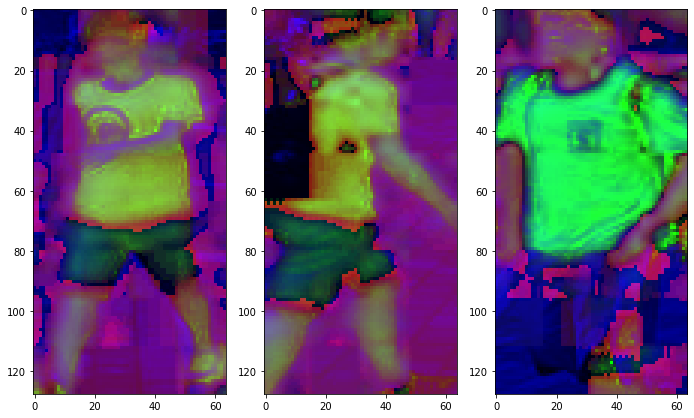

In [140]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(hsv_images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [142]:
for compare_method in range(4):
    base_base = cv.compareHist(hist_base, hist_base, compare_method)
    base_half = cv.compareHist(hist_base, hist_half_down, compare_method)
    base_test1 = cv.compareHist(hist_base, hist_test1, compare_method)
    base_test2 = cv.compareHist(hist_base, hist_test2, compare_method)
    print('Method:', compare_method, 'Perfect, Base-Half, Base-Test(1), Base-Test(2) :',\
          base_base, '/', base_half, '/', base_test1, '/', base_test2)

Method: 0 Perfect, Base-Half, Base-Test(1), Base-Test(2) : 1.0 / 0.8407203544509612 / 0.6571096994037824 / 0.6043476804444115
Method: 1 Perfect, Base-Half, Base-Test(1), Base-Test(2) : 0.0 / 4.196700221214497 / 15.905401209574851 / 11.084995562519461
Method: 2 Perfect, Base-Half, Base-Test(1), Base-Test(2) : 11.83815005235374 / 6.354607690940611 / 5.964600588427857 / 3.8143753221957013
Method: 3 Perfect, Base-Half, Base-Test(1), Base-Test(2) : 1.0536712127723509e-08 / 0.3121541640914226 / 0.42608029828691735 / 0.6485865490313122


Note: Bhattacharyya dist (method 3 seems most promising)